# Supervised Machine Learning: Simple Linear Regression
Objective: To predict the score of percentage of a student depending on the hours invested in studying. 

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Data Loading

In [3]:
#Importing dataset
data=pd.read_excel(r"D:\Masters\Internship\The Sparks Foundation\Task2\Task2.xlsx")
data.shape

(25, 2)

Exploratory Data Analysis

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


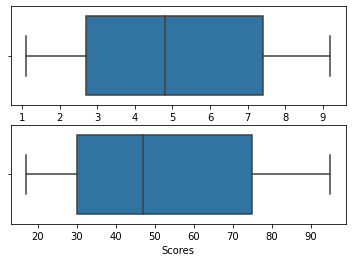

In [8]:
#Boxplots for outlier detection
plt.subplot(2, 1, 1)
sns.boxplot(data['Hours'])
plt.subplot(2, 1, 2)
sns.boxplot(data['Scores'])

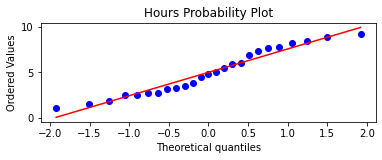

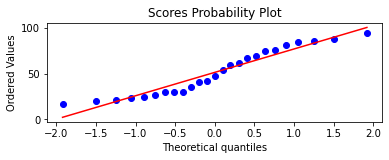

In [9]:
#Checking normality assumption
#Q-Q Plot
plt.subplot(2, 1, 1)
stats.probplot(data['Hours'],dist='norm',plot=plt)
plt.title('Hours Probability Plot')
plt.show()

plt.subplot(2, 1, 2)
stats.probplot(data['Scores'],dist='norm',plot=plt)
plt.title('Scores Probability Plot')
plt.show()

Text(0.5, 1.0, 'Hours V/s Percentage')

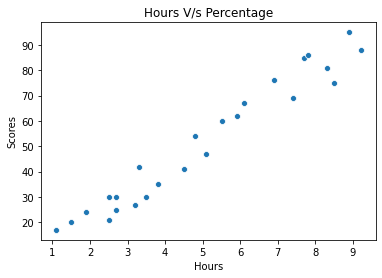

In [10]:
#Linearity Assumption
#Visualizing the realtionship between the predictor and response variable using scatter
sns.scatterplot(x=data['Hours'], y=data['Scores'])
plt.title('Hours V/s Percentage')

In [11]:
#Correlation
correlation=np.corrcoef(data['Hours'],data['Scores'])
correlation

array([[1.        , 0.97619066],
       [0.97619066, 1.        ]])

Observations:
1.There are 25 respondents with 2 variables: Hours spent studying(predictor), Percentage obtained(response variable) 

2.There are no missing values.

3.From the boxplots, there are no outliers present.

4.Normality assumption of dataset is satisfied. Both variables follow normal distribution.

5.As seen from the scatterplot; linearity assumption of dataset is satisfied. 

6.From the pearson correlation coefficient, it can be seen that Hours spent studying and Percentage obtained have a strong positive correlation. 
(Other assumptions will be checked after performing the regression)

Splitting data into test and train 

In [12]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

Fitting the Linear Model



On train dataset

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)

In [14]:
#Plotting the model
slope=print(model.coef_)
intercept =print(model.intercept_)

[9.91065648]
2.018160041434683


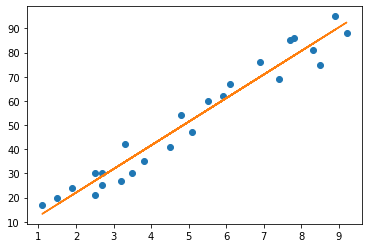

In [18]:
#Plotting the model
plt.plot(data['Hours'], y, 'o')
slope, intercept = np.polyfit(data['Hours'], y, 1)
plt.plot(data['Hours'], slope*data['Hours'] + intercept)

Checking goodness of fit and accuracy of the model

In [19]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_true=y_train,y_pred=y_pred)))

R squared: 0.9515510725211552
Mean Squared Error: 30.89818237731452


The goodness of fit of the model on train data was 95.16%. And MSE(Mean squared error) was 30.90.

Checking Assumptions 
1.Mean of residuals

In [20]:
from sklearn.metrics import r2_score
residuals = (y_train)-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.2862601528904635e-15


Checking Assumptions 2.Homoscedasticity

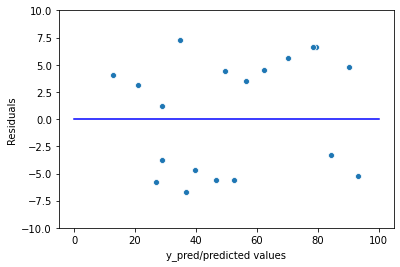

In [21]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
p = sns.lineplot([0,100],[0,0],color='blue')

Checking Assumptions 3.Check for normality of residuals

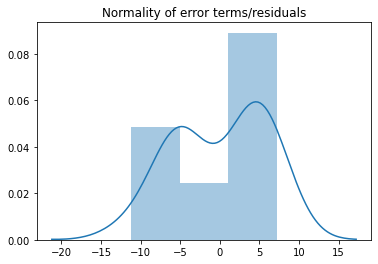

In [22]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Observations:

1.Mean of the residuals is approximately equal to zero. Therefore, assumption satisfied.

2.There is no pattern in error terms or residuals. Therefore homoscedascity present. 

3.The residual terms are approximately normally distributed. We did not obtain perfect normal distribution due to the small sample size of the data. 


Fitting the Linear model

On test dataset

In [23]:
y_pred1 = model.predict(X_test)
# Comparing Actual vs Predicted
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})  
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [24]:
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred1)))
print("Mean Squared Error: {}".format(mean_squared_error(y_true=y_test,y_pred=y_pred1)))

R squared: 0.9454906892105356
Mean Squared Error: 21.5987693072174


The goodness of fit of the model on test data was 94.55%. And MAE(Mean squared error) was 21.60. In the test case, MSE has reduced.

Question: What will be the predicted score if a student study for 9.25 hours in a day

In [25]:
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538
